<a href="https://colab.research.google.com/github/Siddhraj7347/Celebal_Assignment4/blob/main/celebal_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [ ]:
# Step 2: Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
# Step 3: Overview of data
print("Shape of dataset:", df.shape)
print(df.info())
df.head()

Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 4: Check missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


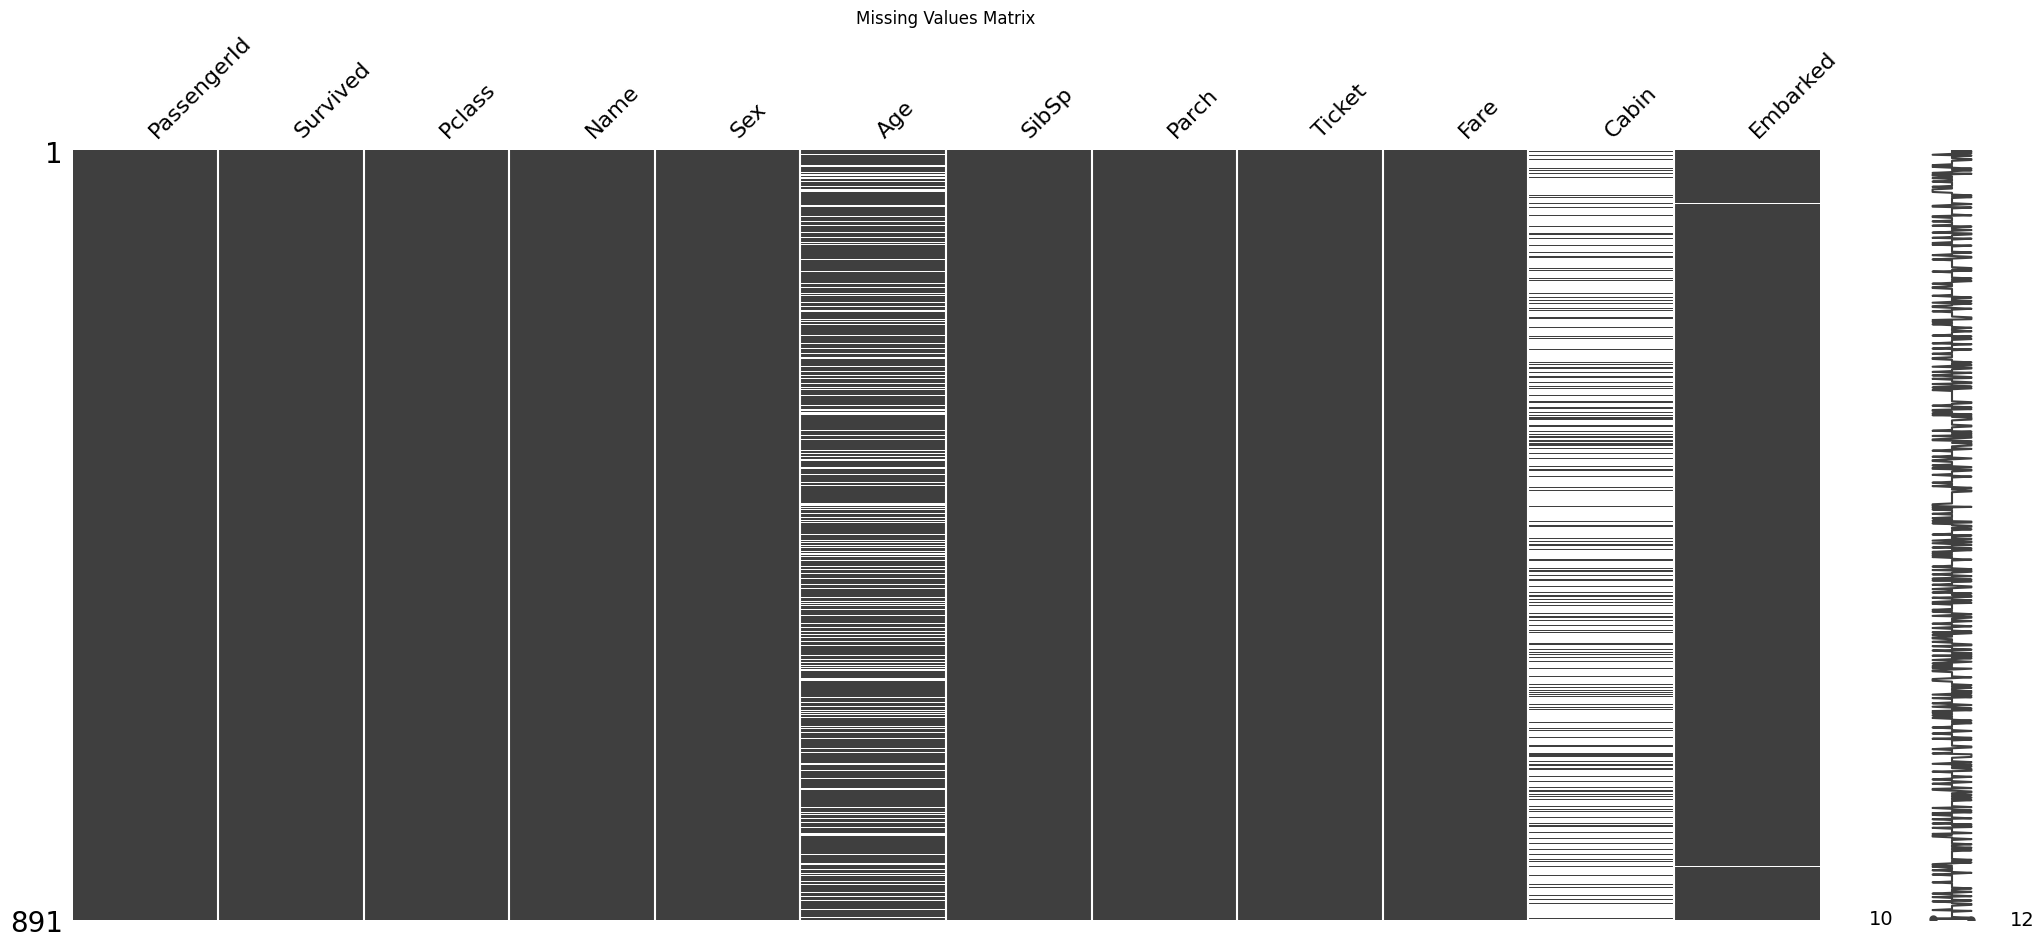

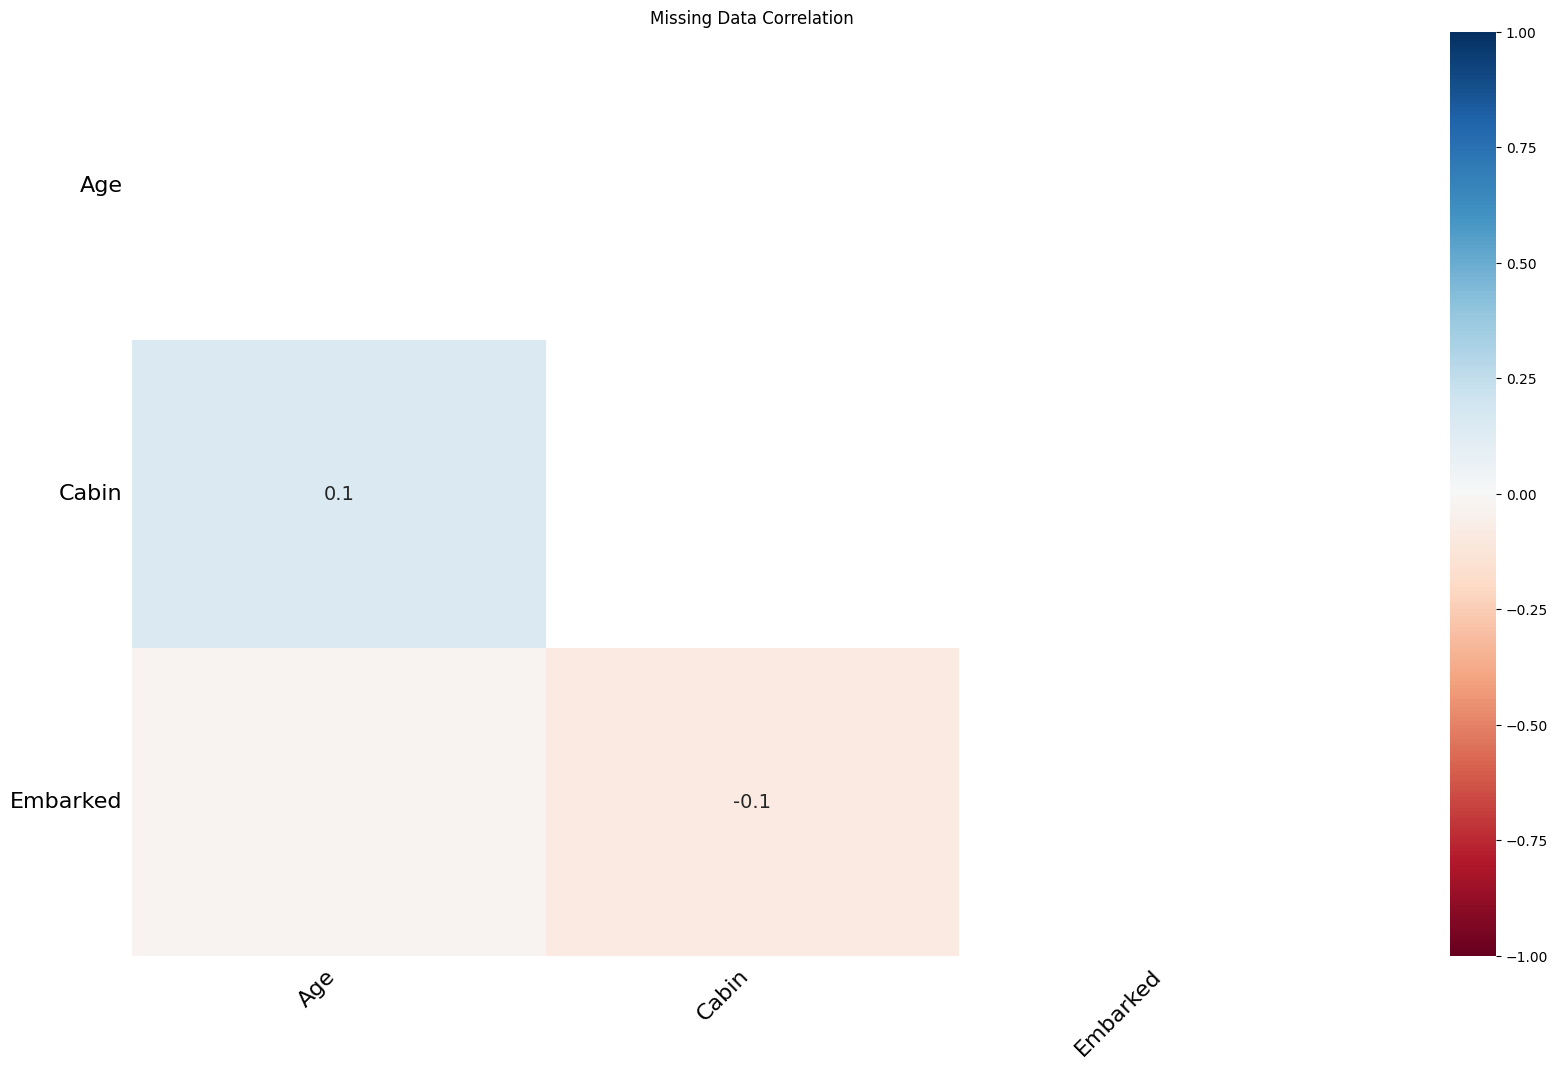

In [ ]:
# Visualize missing data
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()
msno.heatmap(df)
plt.title("Missing Data Correlation")
plt.show()

In [ ]:
# Step 5: Handle missing values
df.drop('Cabin', axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-6-3415164863>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-3415164863>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Step 6: Univariate Analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


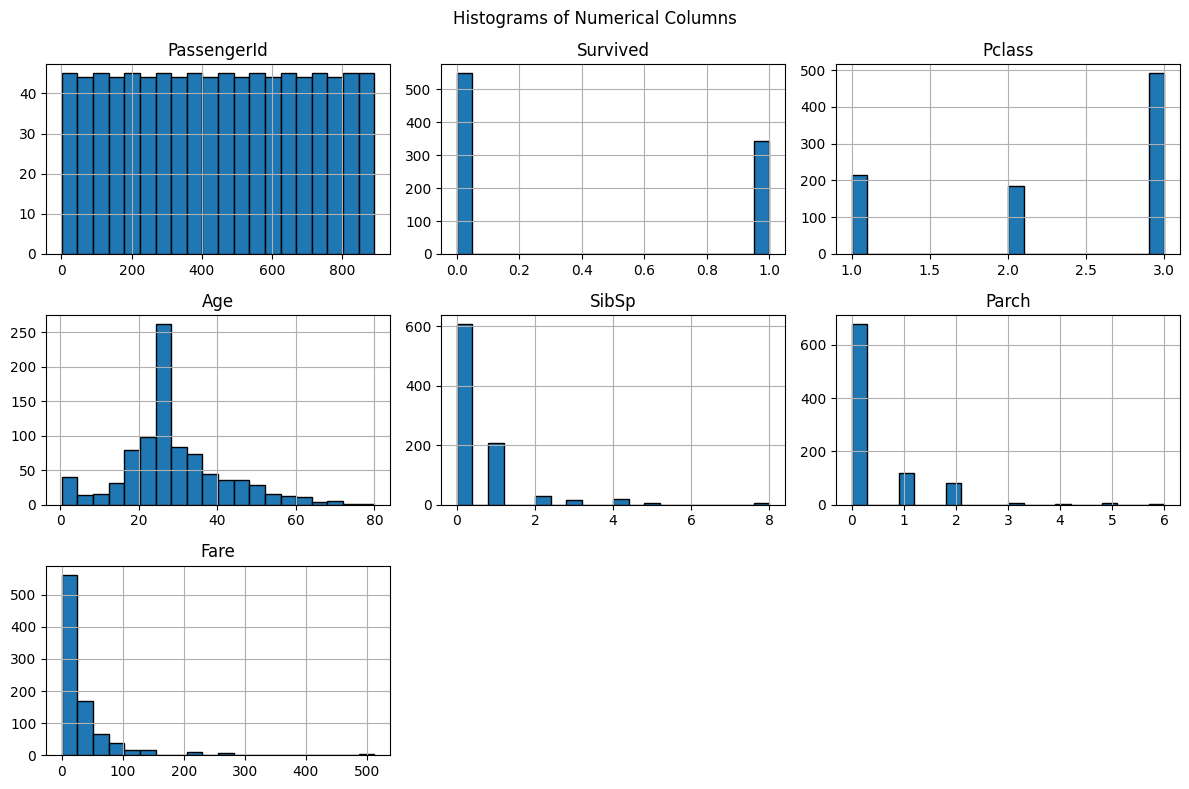

In [ ]:
# Histograms for numerical features
df.hist(figsize=(12, 8), edgecolor='black', bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()

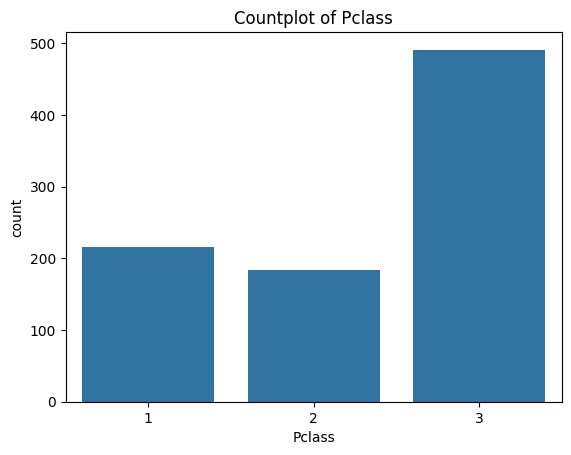

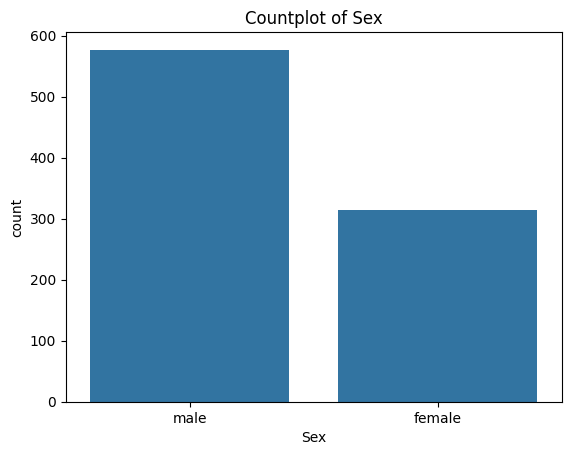

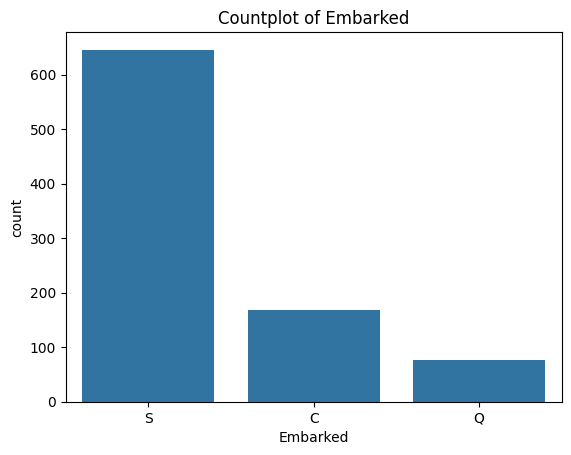

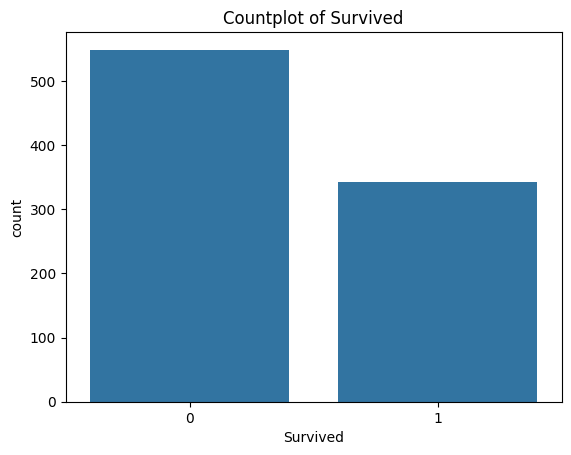

In [ ]:
# Countplots
for col in ['Pclass', 'Sex', 'Embarked', 'Survived']:
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

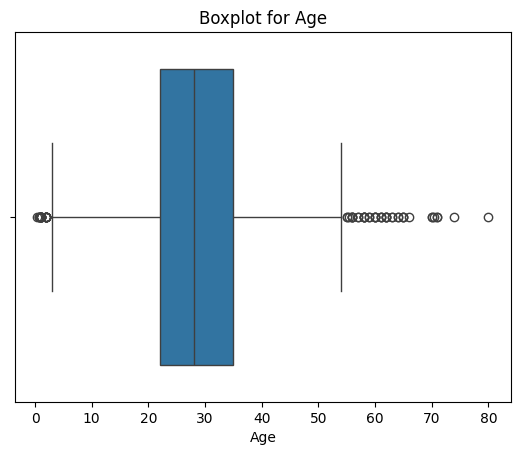

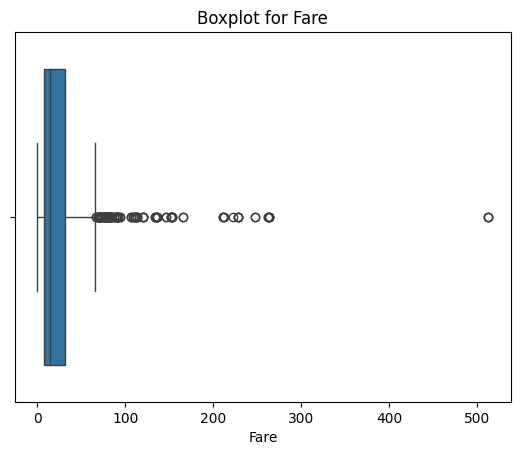

In [ ]:
# Step 7: Outlier Detection
for col in ['Age', 'Fare']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

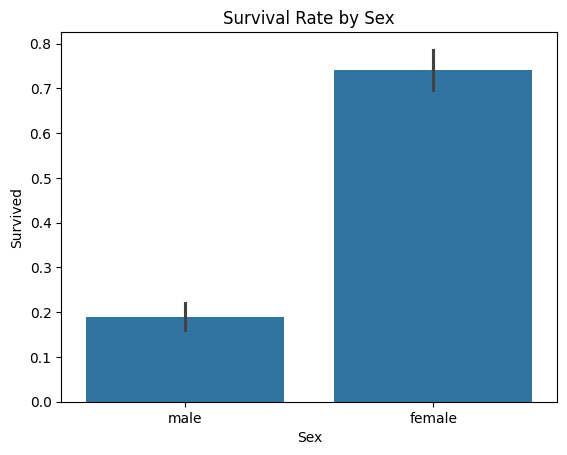

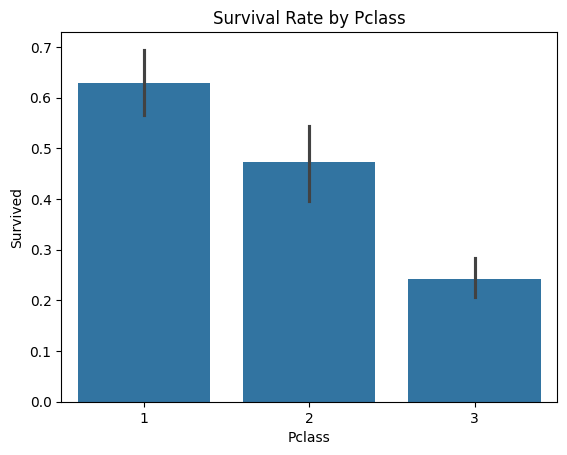

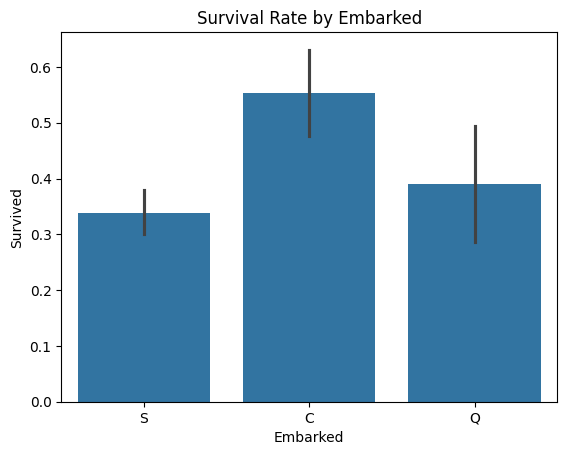

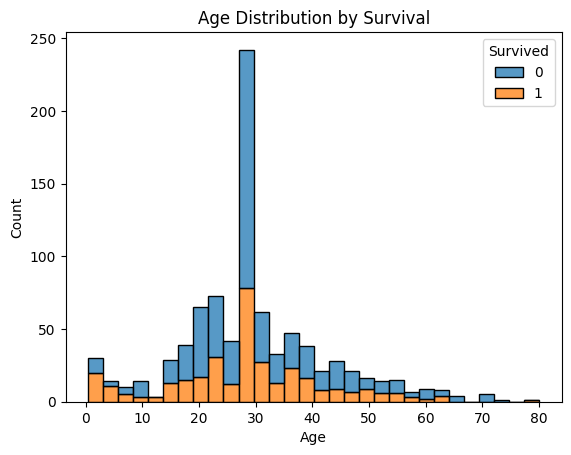

In [ ]:
# Step 8: Bivariate Analysis
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked")
plt.show()
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()

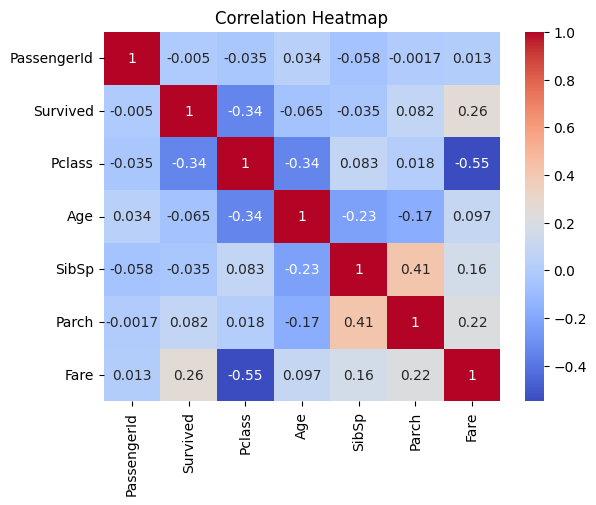

In [ ]:
# Step 9: Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

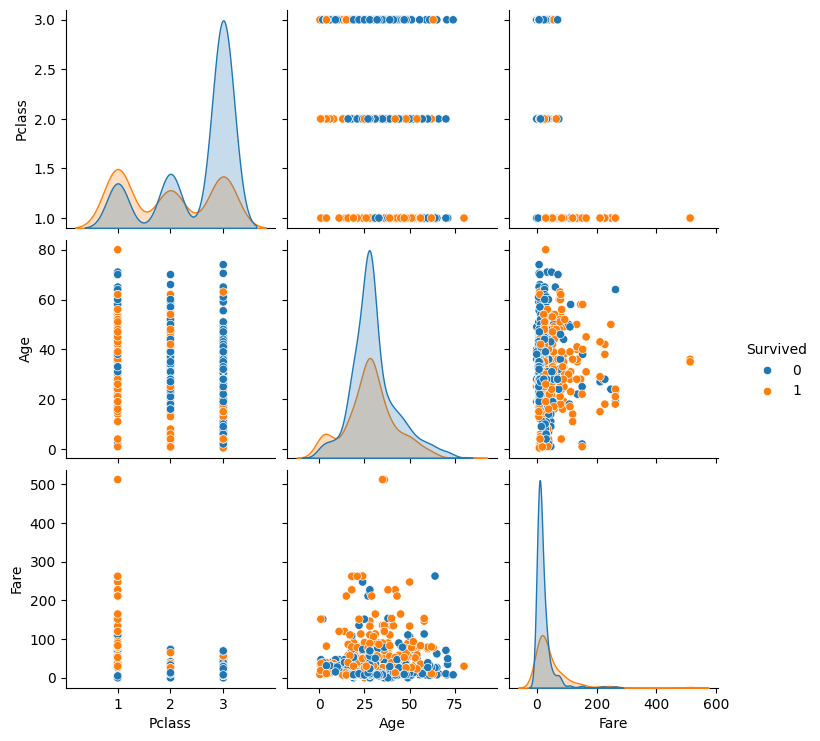

In [ ]:
# Step 10: Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

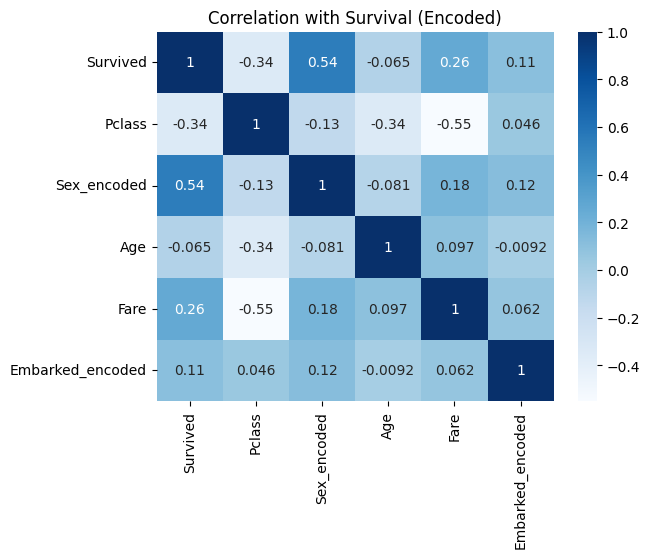

In [ ]:
# Step 11: Encoding and correlation
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked_encoded'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
sns.heatmap(df[['Survived', 'Pclass', 'Sex_encoded', 'Age', 'Fare', 'Embarked_encoded']].corr(), annot=True, cmap='Blues')
plt.title("Correlation with Survival (Encoded)")
plt.show()